In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import cv2

from scipy import ndimage as ndi
from skimage.util import random_noise
from skimage import feature
from skimage import filters

In [2]:
df_train = pd.read_csv("train_labels.csv")
df_train = df_train[df_train['id'].str.startswith('0') | df_train['id'].str.startswith('1') | df_train['id'].str.startswith('2')]
df_train

id  target
0      0000799a2b2c42d       0
1      00042890562ff68       0
2      0005364cdcb8e5b       0
3      0007a5a46901c56       0
4      0009283e145448e       0
...                ...     ...
11215  2ffaac3426692ba       1
11216  2ffb083d397f327       0
11217  2ffc15a4bd1cc57       0
11218  2ffc26459444e4f       0
11219  2fffcf5981093fd       0

[11220 rows x 2 columns]

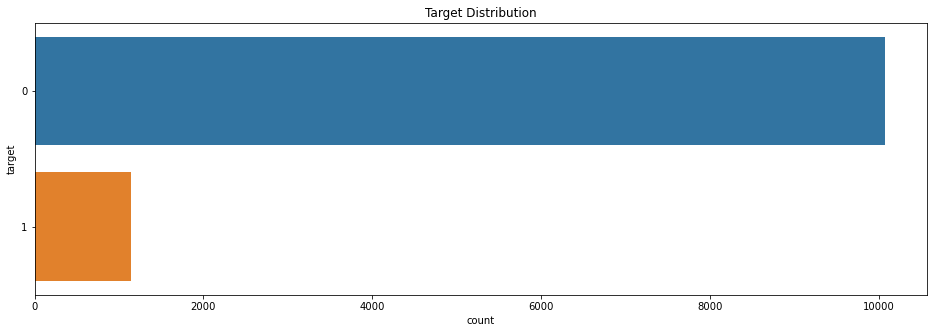

In [3]:
plt.figure(figsize=(16, 5))
sn.countplot(y="target", data=df_train)
plt.title("Target Distribution");

In [4]:
def get_train_filename_by_id(_id: str) -> str:
    return f"train/{_id[0]}/{_id}.npy"


get_train_filename_by_id(df_train.iloc[0]["id"])

'train/0/0000799a2b2c42d.npy'

In [5]:
def show_cadence(filename: str, label: int) -> None:
    plt.figure(figsize=(16, 10))
    arr = np.load(filename)
    for i in range(6):
        plt.subplot(6, 1, i + 1)
        if i == 0:
            plt.title(f"ID: {os.path.basename(filename)} TARGET: {label}", fontsize=18)
        plt.imshow(arr[i].astype(float), interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.text(5, 100, ["ON", "OFF"][i % 2], bbox={'facecolor': 'white'})
        plt.xticks([])
    plt.show()
    
#alternative without filename
def show_cadence_for_array(arr: np.ndarray, ident: str, label: int) -> None:
    plt.figure(figsize=(16, 10))
    for i in range(6):
        plt.subplot(6, 1, i + 1)
        if i == 0:
            plt.title(f"ID: {ident} TARGET: {label}", fontsize=18)
        plt.imshow(arr[i].astype(float), interpolation='nearest', aspect='auto')
        plt.colorbar()
        plt.text(5, 100, ["ON", "OFF"][i % 2], bbox={'facecolor': 'white'})
        plt.xticks([])
    plt.show()
    
def show_image(arr: np.ndarray, ident: str, label: int) -> None:
    plt.figure(figsize=(16, 1))
    plt.title(f"ID: {ident} TARGET: {label}", fontsize=18)
    plt.imshow(arr.astype(float), interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.xticks([])
    plt.show()

In [6]:
#df_tmp = df_train[df_train["target"] == 1].head(200)
#                  
#for ind, row in df_tmp.iterrows():
#    show_cadence(get_train_filename_by_id(row["id"]), row["target"])
#    print(ind)

                 id  target
36  0028a35de92941d       1
44  002efdabe4e3e45       1
50  0031e823c133be2       1
61  00412077d1aef6f       1
78  0055e9458a0f03a       1
98  00776881dd80050       1


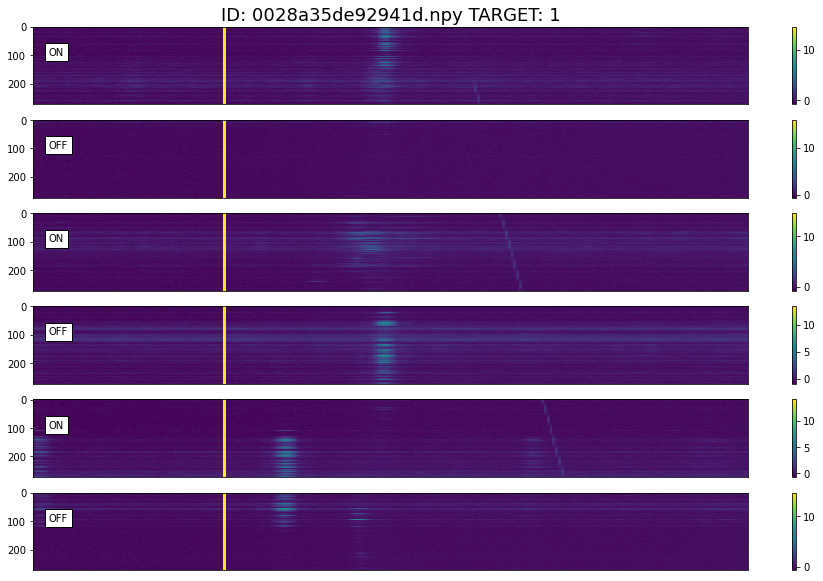

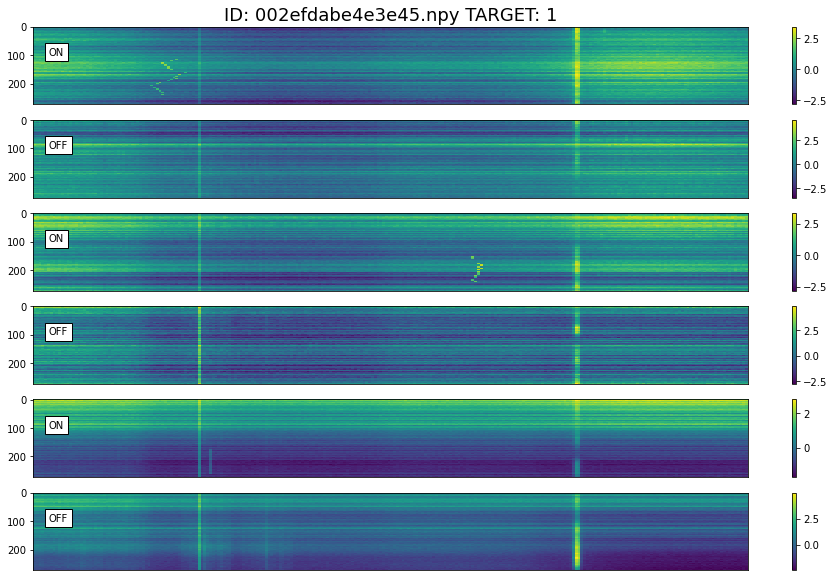

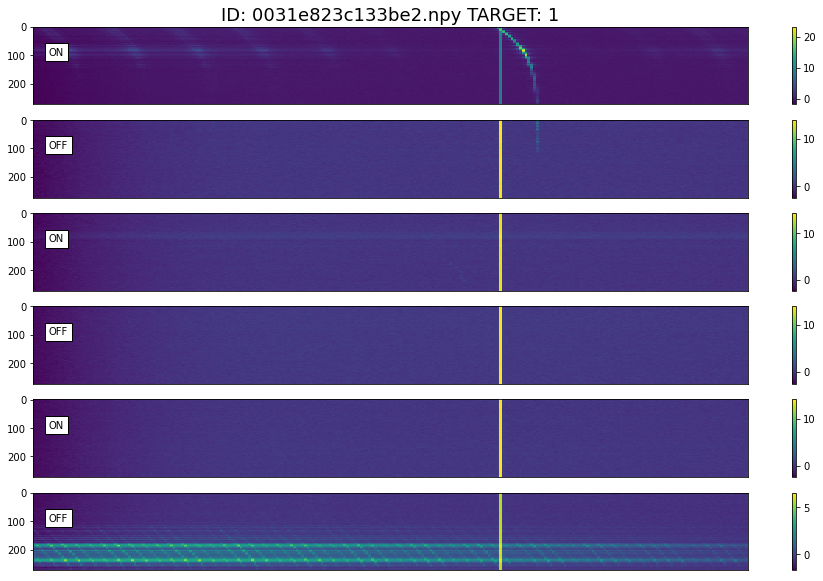

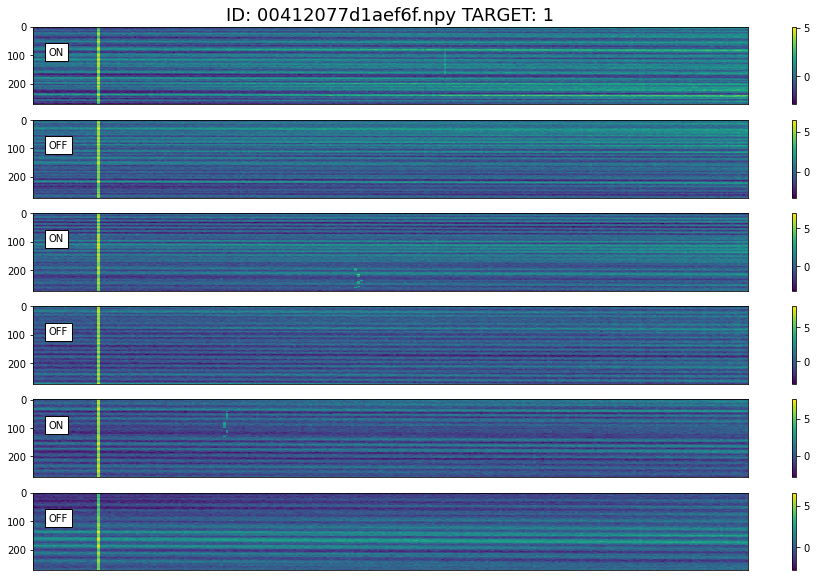

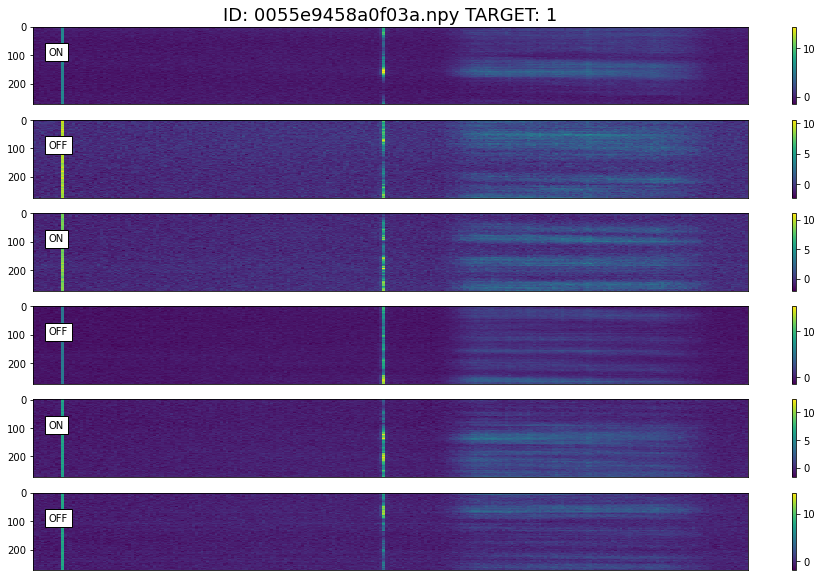

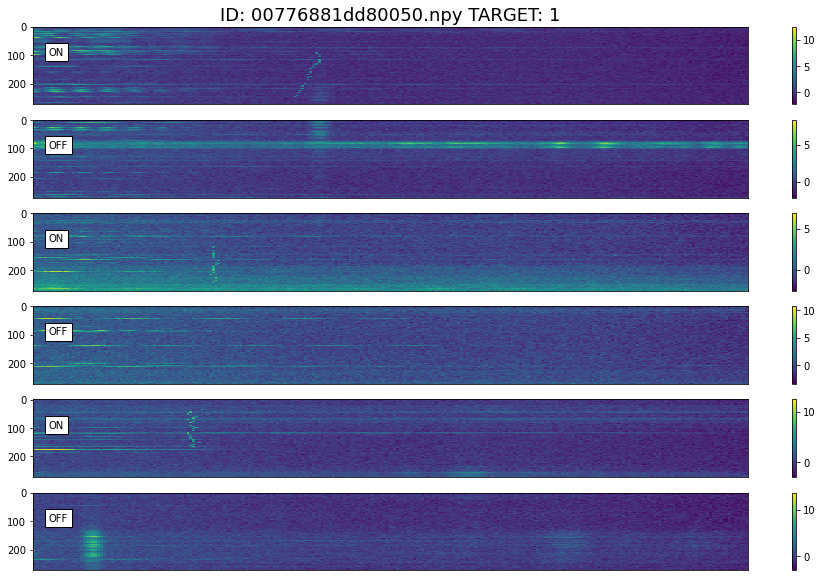

In [7]:
#df_tmp = df_train[df_train["target"] == 0].sample(1)
#for ind, row in df_tmp.iterrows():
#    show_cadence(get_train_filename_by_id(row["id"]), row["target"])

df_tmp = df_train[df_train["target"] == 1].head(50)#.sample(5)
indices = [1, 2, 3, 4, 6, 7]
df_samples = df_tmp.iloc[indices]
print(df_samples)
for ind, row in df_samples.iterrows():
    show_cadence(get_train_filename_by_id(row["id"]), row["target"])

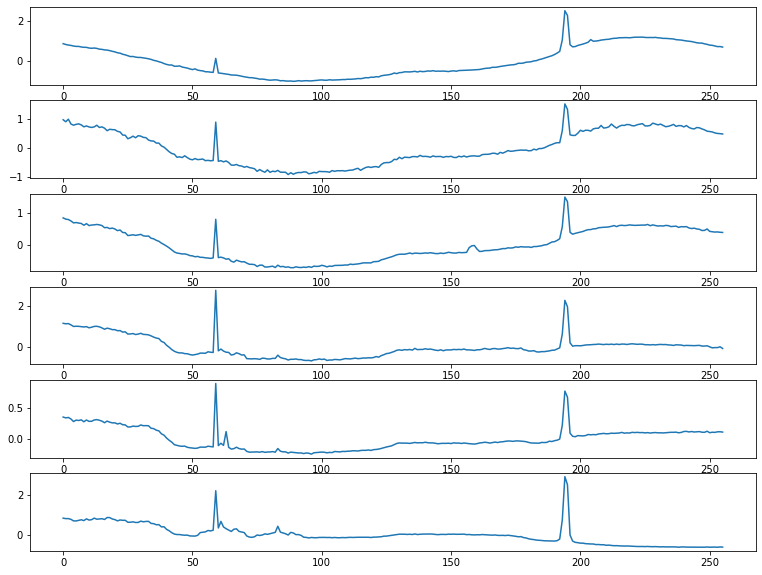

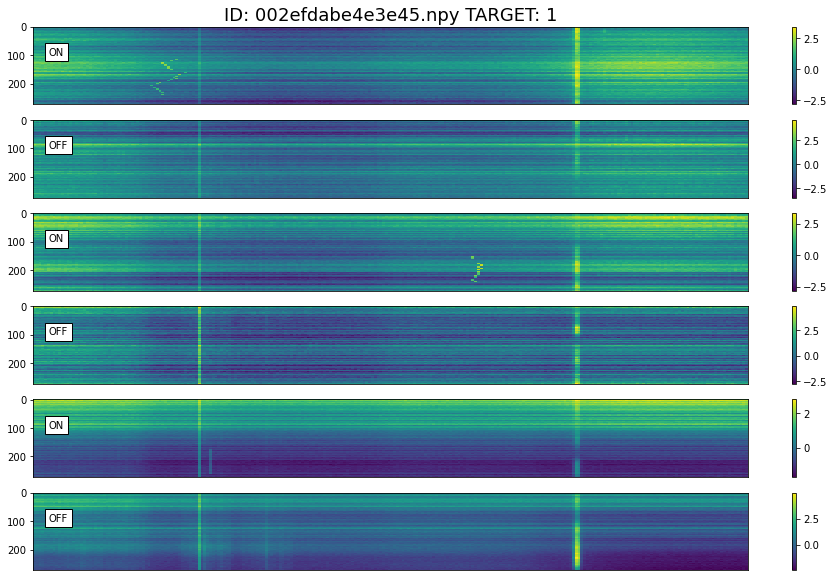

In [8]:
sampleArrTg1 = np.load(get_train_filename_by_id(df_samples["id"].iloc[1]))
#sampleArrTg1New[0] = sampleArrTg1[0] # invariant ggü. +-*/

#print(np.mean(sampleArrTg1[0], axis=0))
fig, ax = plt.subplots(6,1, figsize=(13, 10)) # gerade Indizes (mit Nadeln)
for ind, val in enumerate(sampleArrTg1):
        ax[ind].plot(np.mean(val, axis=0))

show_cadence(get_train_filename_by_id(df_samples["id"].iloc[1]), row["target"])

[[[-0.8066 -0.8125 -0.836  ... -0.753  -0.7676 -0.6807]
  [-0.8345 -0.8325 -0.823  ... -0.7407 -0.75   -0.6704]
  [-0.8403 -0.8154 -0.8438 ... -0.7695 -0.754  -0.6807]
  ...
  [-0.5967 -0.5884 -0.5894 ... -0.4937 -0.5215 -0.4324]
  [-0.6416 -0.63   -0.6343 ... -0.5225 -0.53   -0.4546]
  [-0.6357 -0.6377 -0.6396 ... -0.543  -0.544  -0.4778]]

 [[-0.5776 -0.5444 -0.537  ... -0.5415 -0.559  -0.4614]
  [-0.5483 -0.515  -0.5376 ... -0.5596 -0.5205 -0.508 ]
  [-0.5405 -0.5146 -0.555  ... -0.5513 -0.5117 -0.4924]
  ...
  [-0.5356 -0.53   -0.537  ... -0.4312 -0.433  -0.355 ]
  [-0.571  -0.5493 -0.561  ... -0.4878 -0.4368 -0.3481]
  [-0.564  -0.576  -0.557  ... -0.487  -0.4924 -0.373 ]]

 [[-0.4233 -0.468  -0.4287 ... -0.3682 -0.3599 -0.303 ]
  [-0.427  -0.4329 -0.4255 ... -0.3657 -0.3613 -0.2876]
  [-0.4316 -0.428  -0.4297 ... -0.3545 -0.3516 -0.2888]
  ...
  [-0.705  -0.6943 -0.7485 ... -0.7163 -0.685  -0.7114]
  [-0.739  -0.743  -0.702  ... -0.7197 -0.6875 -0.666 ]
  [-0.707  -0.727  -0.7114

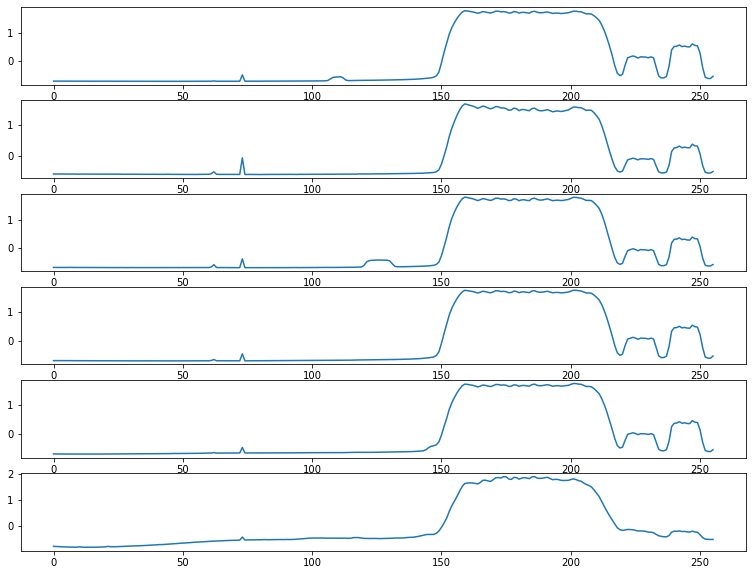

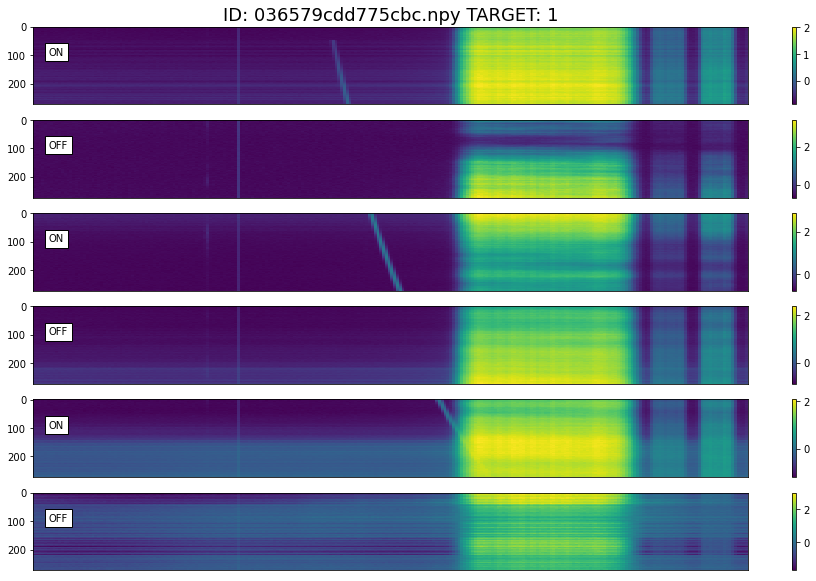

In [9]:
#print(df_train.iloc[797]) # sample
sampleArrTg1 = np.load(get_train_filename_by_id("036579cdd775cbc"))
print(sampleArrTg1)

fig, ax = plt.subplots(6,1, figsize=(13, 10)) # gerade Indizes (mit Nadeln)
for ind, val in enumerate(sampleArrTg1):
        ax[ind].plot(np.mean(val, axis=0))

show_cadence(get_train_filename_by_id("036579cdd775cbc"), 1)

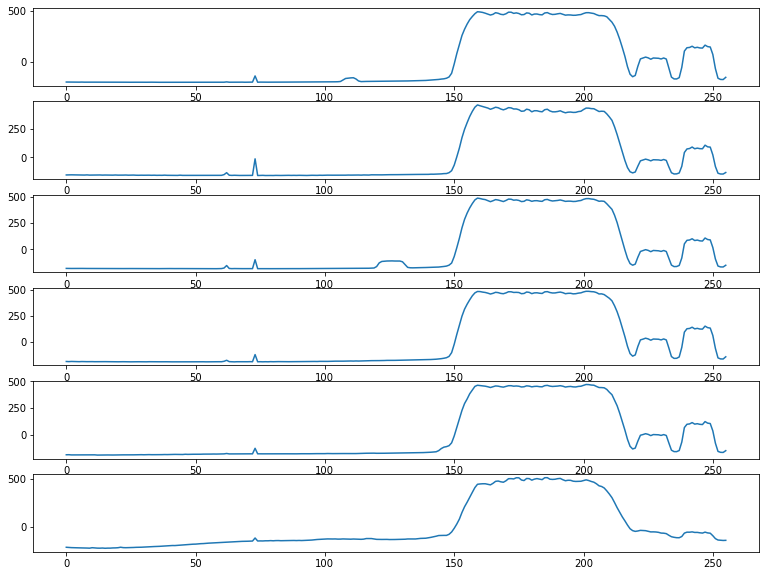

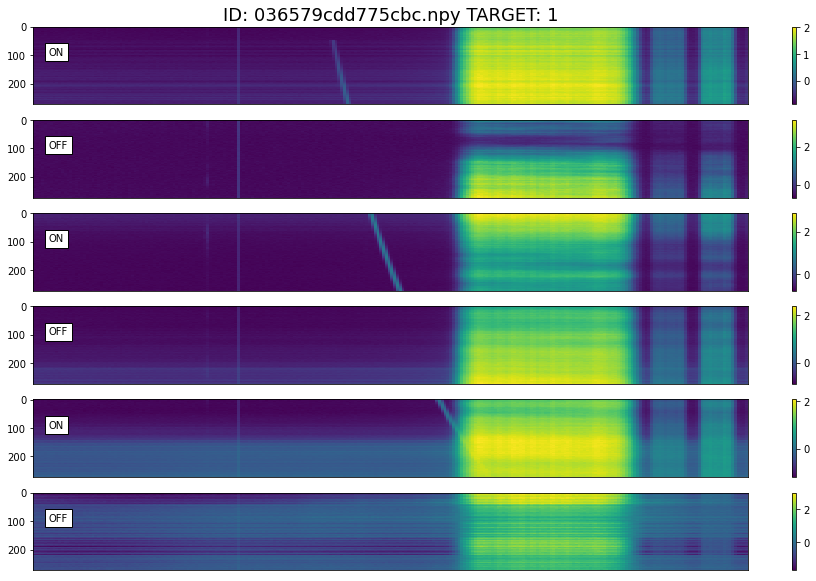

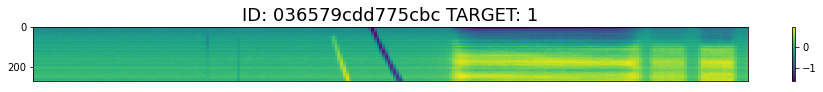

In [10]:
sampleArrTg1 = np.load(get_train_filename_by_id("036579cdd775cbc"))

fig, ax = plt.subplots(6,1, figsize=(13, 10)) # gerade Indizes (mit Nadeln)
for ind, val in enumerate(sampleArrTg1):
        ax[ind].plot(np.sum(val, axis=0))

show_cadence(get_train_filename_by_id("036579cdd775cbc"), 1)

sampleArrTg2 = sampleArrTg1[0] - sampleArrTg1[2]
show_image(sampleArrTg2, "036579cdd775cbc", 1)

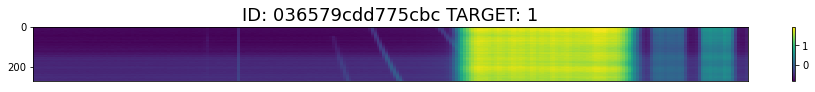

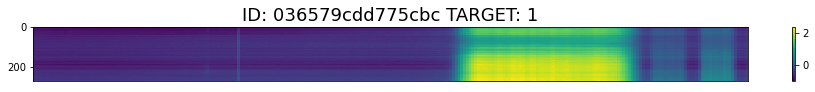

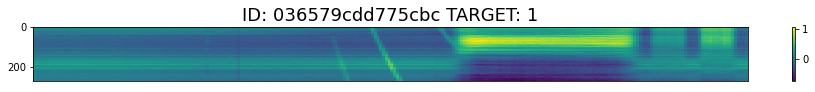

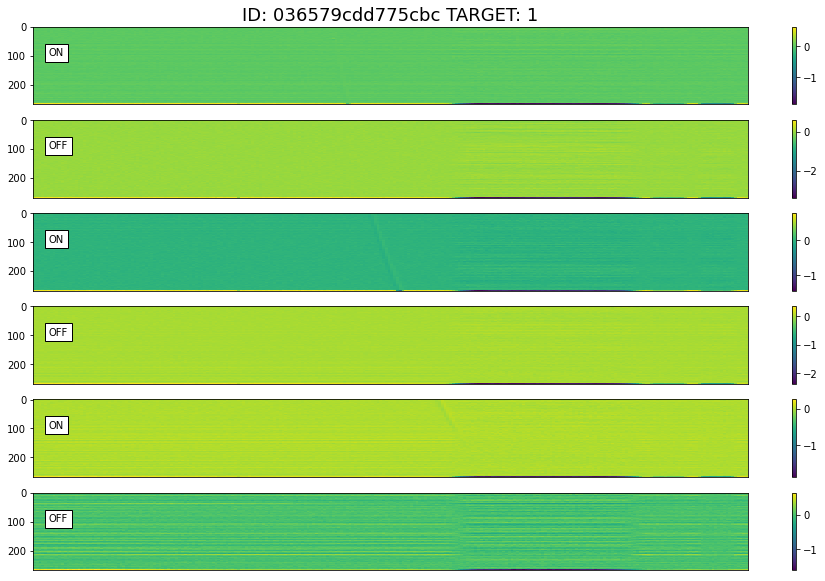

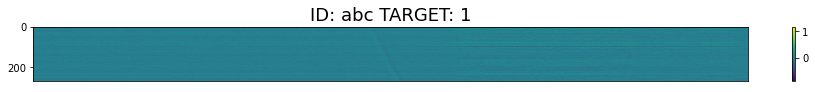

In [14]:
### TODO: Boxmäßig berechnen
sampleArrTg3 = (sampleArrTg1[0] + sampleArrTg1[2] + sampleArrTg1[4]) / 3
sampleArrTg32ndPart = (sampleArrTg1[1] + sampleArrTg1[3] + sampleArrTg1[5]) / 3

show_image(sampleArrTg3, "036579cdd775cbc", 1)
show_image(sampleArrTg32ndPart, "036579cdd775cbc", 1)
show_image(sampleArrTg3 - sampleArrTg32ndPart, "036579cdd775cbc", 1)

sampleArrBox = np.load(get_train_filename_by_id("036579cdd775cbc"))
newArr = np.zeros((6, 269, 256))
for ind, d in enumerate(sampleArrBox):
    for i in range(3, d.shape[0] - 3):
        newArr[ind][i-3] = np.mean(d[i-2:i+3], axis=0)
        

show_cadence_for_array(newArr - sampleArrBox[:,2:-2,:], "036579cdd775cbc", 1)
show_image((newArr-sampleArrBox[:,2:-2,:])[0] - (newArr-sampleArrBox[:, 2:-2, :])[2], "abc", 1)
#show_image(sampleArrBox, "036579cdd775cbc", 1)

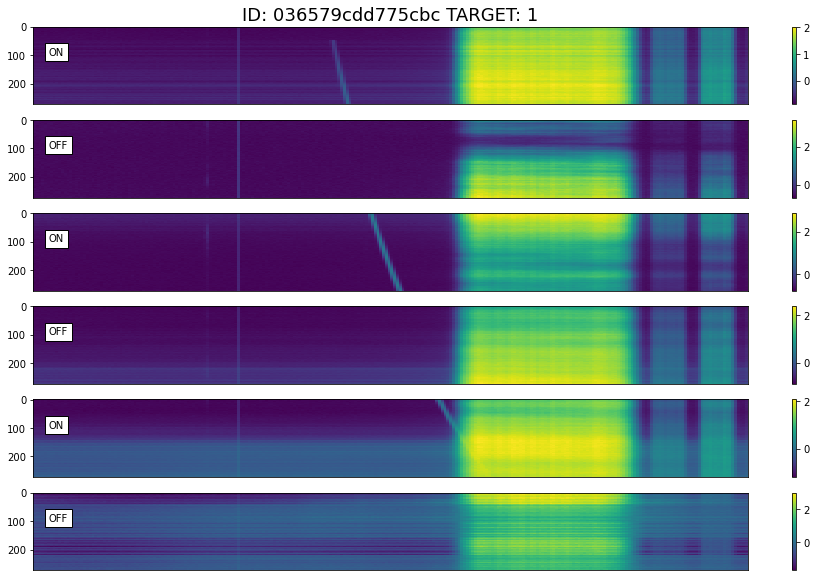

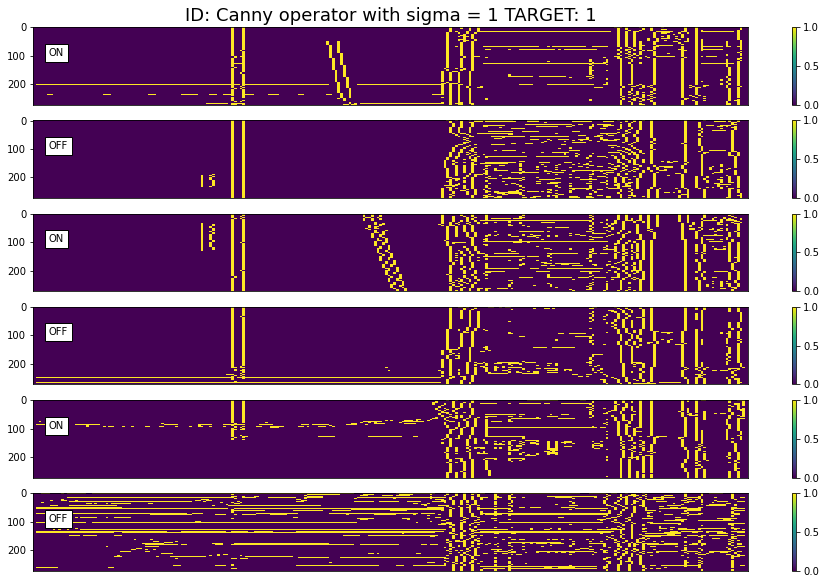

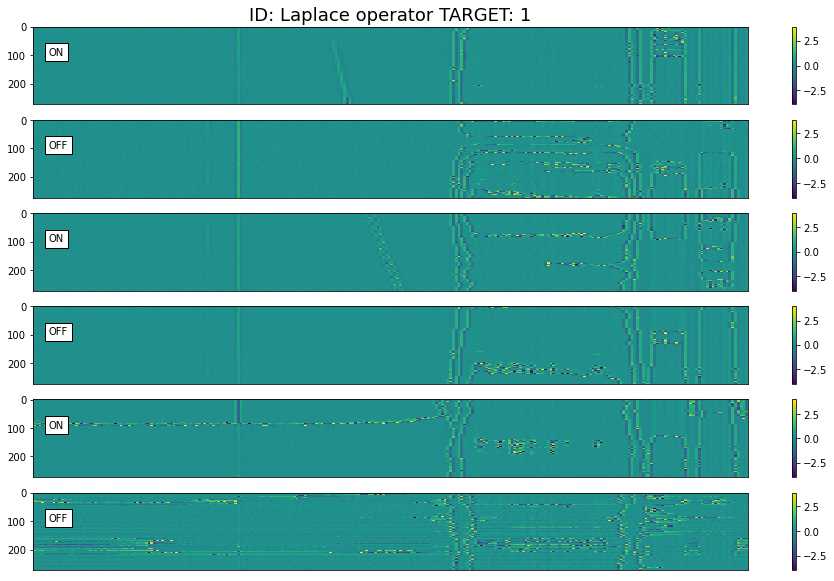

In [85]:
sampleArrTg1 = np.load(get_train_filename_by_id("036579cdd775cbc"))
sampleArrTg1Norm = np.asarray(sampleArrTg1 * 255, dtype=np.uint8)
show_cadence_for_array(sampleArrTg1, "036579cdd775cbc", 1)
#print(sampleArrTg1Norm)
edges = []
for i in range(6):
    edges.append(feature.canny(ndi.gaussian_filter(sampleArrTg1Norm[i], 1), sigma=1))
    
edgesLaplace = []
for i in range(6):
    edgesLaplace.append(filters.laplace(sampleArrTg1Norm[i]))

show_cadence_for_array(edges, "Canny operator with sigma = 1 (binarized)", 1)

show_cadence_for_array(edgesLaplace, "Laplace operator", 1)

#fig, ax = plt.subplots(6,1, figsize=(13, 10)) # gerade Indizes (mit Nadeln)
#for ind, val in enumerate(sampleArrTg1):
#        ax[ind].plot(np.sum(val, axis=0))

#show_cadence(get_train_filename_by_id("036579cdd775cbc"), 1)